<a href="https://colab.research.google.com/github/mwang-cmn/Retail-Sales-Analysis/blob/main/Retail_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
path = "/content/drive/MyDrive/Colab Notebooks/Retail_Sales/"
data = pd.read_csv(path + "sales_data_sample.csv", encoding='latin1', parse_dates= ['ORDERDATE'])
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [85]:
#Make a copy of dataset
retail_data = data.copy()

In [86]:
retail_data.shape

(2823, 25)

In [87]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [88]:
#Check for duplicates
retail_data.duplicated().sum()

0

There are 307 unique orders and these sales occured in 252 days, from 6th January 2003 to 31st May 2005.

In [89]:
#Check for unique values in each column
retail_data.nunique()
# Check range of Dates
print(f'Start Date: {retail_data["ORDERDATE"].min()}')
print(f'End Date: {retail_data["ORDERDATE"].max()}')

Start Date: 2003-01-06 00:00:00
End Date: 2005-05-31 00:00:00


In [100]:
# Check for null values
retail_data.isnull().sum()

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
ADDRESSLINE1          0
CITY                  0
STATE              1486
COUNTRY               0
TERRITORY          1074
DEALSIZE              0
CONTACTNAME           0
YEAR                  0
MONTH                 0
WEEKDAY               0
QUARTER               0
dtype: int64

In [104]:
#Drop Irrelevant columns and reset index
#retail_data= retail_data.drop([ 'QTR_ID',	'MONTH_ID',	'YEAR_ID'], axis=1).reset_index(drop=True)
# null values in territory column
null_territory = retail_data['TERRITORY'].isnull().sum()
print(f'Number of null values in territory column: {null_territory}')
# view countries in Each territory
countries_by_territory = retail_data.groupby('TERRITORY')['COUNTRY'].unique()
print(f'Countries by territory:\n{countries_by_territory}')
# Impute null values in territorry column with AMER - Americas consisting the USA and Canada
retail_data['TERRITORY'] = retail_data['TERRITORY'].fillna('AMER')

Number of null values in territory column: 0
Countries by territory:
TERRITORY
AMER                                         [USA, Canada]
APAC                                [Australia, Singapore]
EMEA     [France, Norway, Finland, Austria, UK, Spain, ...
Japan                      [Singapore, Japan, Philippines]
Name: COUNTRY, dtype: object


In [106]:
#Null values in the State column
null_states =retail_data[retail_data['STATE'].isnull()]
# Get unique cities with null states
cities_with_null_states = null_states['CITY'].unique()
print(cities_with_null_states)

['Reims' 'Paris' 'Lille' 'Bergen' 'Nantes' 'Helsinki' 'Stavern' 'Salzburg'
 'Liverpool' 'Madrid' 'Lule' 'Singapore' 'Lyon' 'Torino' 'Boras'
 'Versailles' 'Kobenhavn' 'London' 'Toulouse' 'Barcelona' 'Bruxelles'
 'Oulu' 'Graz' 'Makati City' 'Marseille' 'Koln' 'Gensve' 'Reggio Emilia'
 'Frankfurt' 'Espoo' 'Dublin' 'Manchester' 'Aaarhus' 'Sevilla'
 'Strasbourg' 'Oslo' 'Bergamo' 'Munich' 'Charleroi']


In [108]:
#copy of our dataset
retail_df = retail_data.copy()
#Convert object dtypes to categorical columns
categorical_columns = retail_df.select_dtypes(include=['object']).columns
#retail_df[categorical_columns] = retail_df[categorical_columns].astype('category')
categorical_columns

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1',
       'CITY', 'STATE', 'COUNTRY', 'TERRITORY', 'DEALSIZE', 'CONTACTNAME',
       'MONTH', 'WEEKDAY'],
      dtype='object')

In [109]:
print(retail_df.shape)
print(retail_df.info())

(2823, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   float64       
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   PRODUCTLINE      2823 non-null   object        
 8   MSRP             2823 non-null   int64         
 9   PRODUCTCODE      2823 non-null   object        
 10  CUSTOMERNAME     2823 non-null   object        
 11  ADDRESSLINE1     2823 non-null   object        
 12  CITY             2823 non-null   object        
 13  STATE            1337 non-null   object        
 14  COUNTRY          2823 non-nul

I will create a Revenue column, based on quantity ordered and price of each item. Then I will sort the data by quantity ordered, price, revenue and sales, in ascending order.
Notably,

In [110]:
#Create Revenue Column
retail_df['REVENUE'] = retail_df['QUANTITYORDERED'] * retail_df['PRICEEACH']
#Sort Data by Quantity, price, revenue and sales
retail_df.sort_values(by=['QUANTITYORDERED', 'PRICEEACH', 'REVENUE', 'SALES']).head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,...,STATE,COUNTRY,TERRITORY,DEALSIZE,CONTACTNAME,YEAR,MONTH,WEEKDAY,QUARTER,REVENUE
1287,10407,6,90.19,3,541.14,2005-04-22,On Hold,Vintage Cars,92,S18_4409,...,CA,USA,AMER,Small,Sue Frick,2005,April,Friday,2,541.14
751,10409,6,100.00,2,785.64,2005-04-23,Shipped,Vintage Cars,127,S18_2325,...,NaN,Singapore,APAC,Small,Wendy Victorino,2005,April,Saturday,2,600.00
907,10423,10,88.14,1,881.40,2005-05-30,In Process,Vintage Cars,101,S18_2949,...,NaN,Belgium,EMEA,Small,Catherine Dewey,2005,May,Monday,2,881.40
315,10419,10,100.00,11,1092.20,2005-05-17,Shipped,Classic Cars,117,S12_3380,...,NaN,Austria,EMEA,Small,Georg Pipps,2005,May,Tuesday,2,1000.00
2249,10425,11,43.83,6,482.13,2005-05-31,In Process,Trucks and Buses,54,S32_2509,...,NaN,France,EMEA,Small,Janine Labrune,2005,May,Tuesday,2,482.13


In [97]:

#Create year, month and weekday columns from orderdate
retail_data['YEAR'] = pd.to_datetime(retail_data['ORDERDATE']).dt.year
retail_data['MONTH'] = pd.to_datetime(retail_data['ORDERDATE']).dt.strftime('%B')
retail_data['WEEKDAY'] = pd.to_datetime(retail_data['ORDERDATE']).dt.day_name()
retail_data['QUARTER'] = pd.to_datetime(retail_data['ORDERDATE']).dt.quarter
retail_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE,CONTACTNAME,YEAR,MONTH,WEEKDAY,QUARTER
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,NY,USA,NaN,Small,Kwai Yu,2003,February,Monday,1
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,NaN,France,EMEA,Small,Paul Henriot,2003,May,Wednesday,2
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,France,EMEA,Medium,Daniel Da Cunha,2003,July,Tuesday,3
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,CA,USA,NaN,Medium,Julie Young,2003,August,Monday,3
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,San Francisco,CA,USA,NaN,Medium,Julie Brown,2003,October,Friday,4


### Outlier Detection

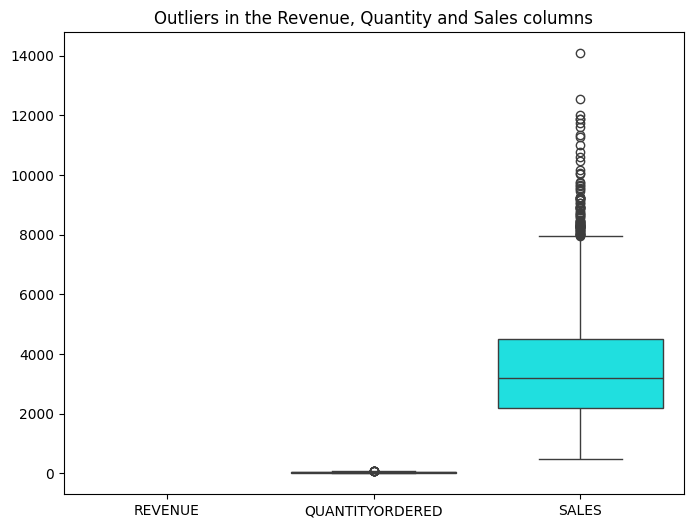

In [68]:
#Identifying Outliers
plt.figure(figsize=(8,6))
outlier = pd.DataFrame(data=retail_data, columns = ['REVENUE', 'QUANTITYORDERED', 'SALES'])
sns.boxplot(data=outlier, color='cyan')
plt.title('Outliers in the Revenue, Quantity and Sales columns')
plt.show()

The boxplot above identified outliers in the Sales column. However, the revenue column appears to have none. This indicates that there are discrepancies in either column. Recall the Revenue column was a direct calculation, of Quantity ordered and Price of each item, therefore, should have been equivalent to the Sales column values. The number of dicrepancies is 1304, about 46% of the dataset
Since this is not the case, its important to find out why these discrepancies exist and their source.

In [69]:
retail_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,MSRP,YEAR,QUARTER,REVENUE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.00000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,100.715551,2003.81509,2.717676,2936.906408
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,33.000000,2003.00000,1.000000,482.130000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,68.000000,2003.00000,2.000000,2100.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,99.000000,2004.00000,3.000000,2800.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,124.000000,2004.00000,4.000000,3726.810000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,214.000000,2005.00000,4.000000,9048.160000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,40.187912,0.69967,1.203878,1105.644284


## Exploratory Data Analysis(EDA)

In [70]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   float64       
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   category      
 7   PRODUCTLINE      2823 non-null   category      
 8   MSRP             2823 non-null   int64         
 9   PRODUCTCODE      2823 non-null   category      
 10  CUSTOMERNAME     2823 non-null   category      
 11  ADDRESSLINE1     2823 non-null   category      
 12  CITY             2823 non-null   category      
 13  STATE            2823 non-null   category      
 14  COUNTRY          2823 non-null   categor

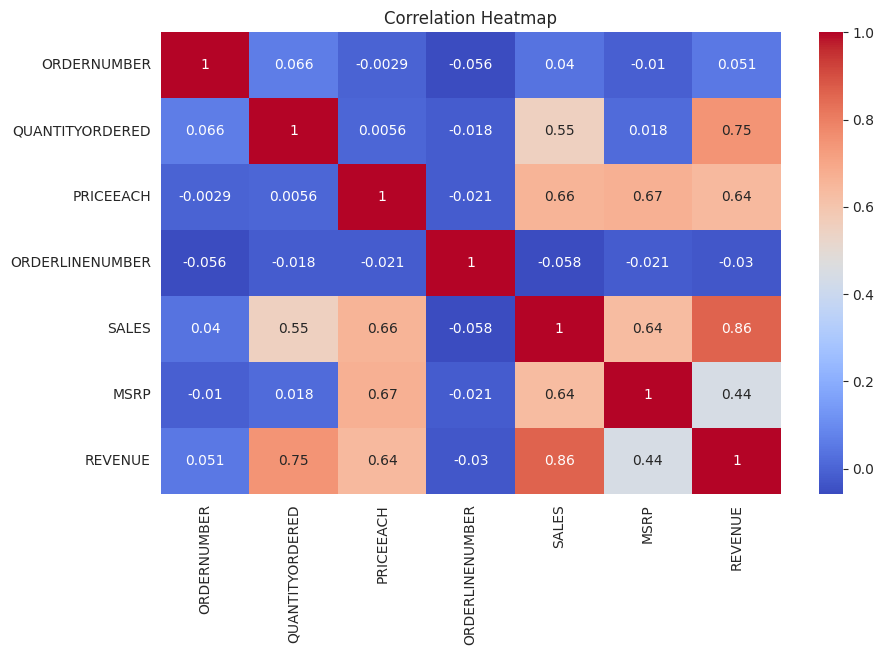

In [74]:
#Correlation heatmap
numerical_columns = retail_df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize = (10,6))
sns.heatmap(retail_df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Univariate Analysis

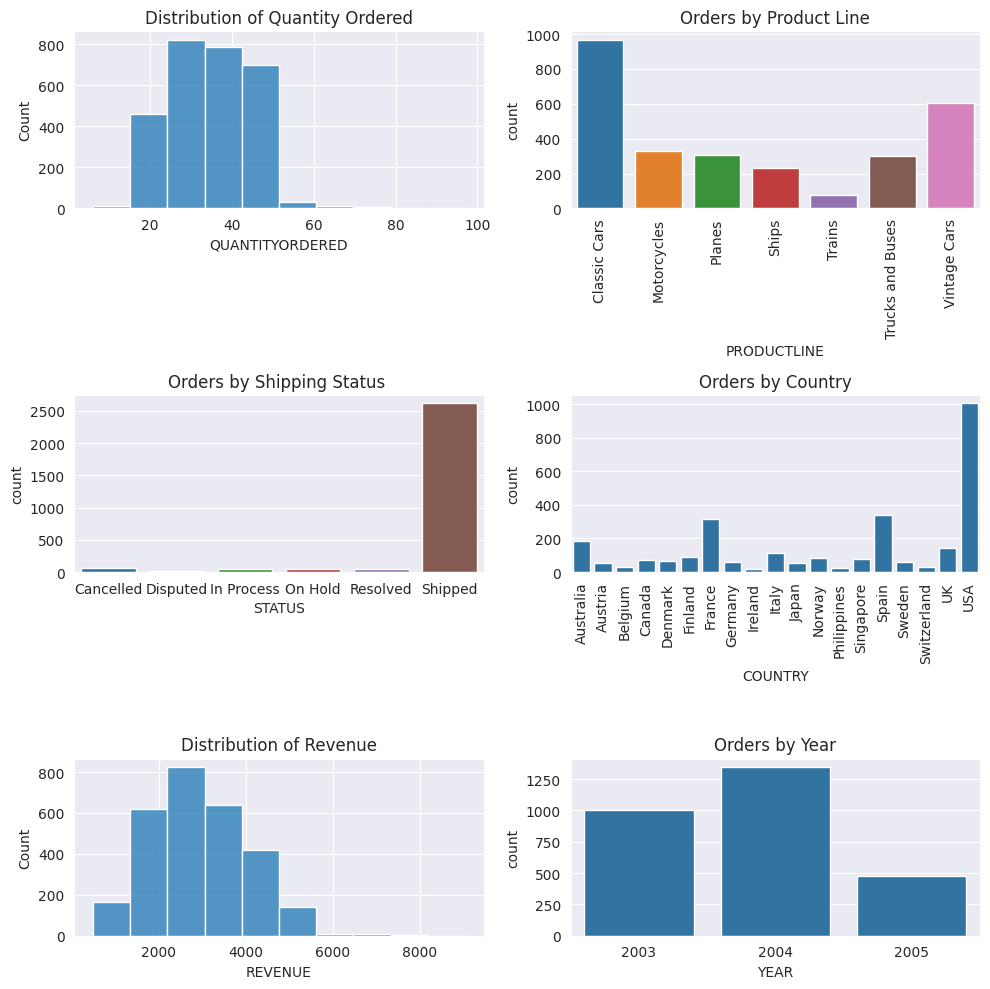

In [73]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10,10), ncols=2, nrows=3)
sns.histplot(data = retail_df, x = 'QUANTITYORDERED', bins = 10 , ax=ax[0,0])
ax[0, 0].set_title("Distribution of Quantity Ordered")
sns.countplot(data=retail_df, x='PRODUCTLINE',hue='PRODUCTLINE' ,ax = ax[0,1])
ax[0, 1].set_title("Orders by Product Line")
ax[0, 1].tick_params(axis='x', rotation=90)
sns.countplot(data=retail_df, x='STATUS', hue='STATUS', ax = ax[1,0])
ax[1, 0].set_title("Orders by Shipping Status ")
sns.countplot(data=retail_df, x='COUNTRY', ax = ax[1,1])
ax[1, 1].set_title("Orders by Country")
ax[1, 1].tick_params(axis='x', rotation=90)
sns.histplot(data = retail_df, x = 'REVENUE', bins = 10 , ax=ax[2,0])
ax[2, 0].set_title("Distribution of Revenue")
sns.countplot(data=retail_df, x='YEAR', ax = ax[2,1])
ax[2, 1].set_title("Orders by Year")
plt.tight_layout()
plt.show()

## Multivariate Statistics
### Time Series Analysis

In [ ]:
# Sales vs time
#Sort the Month column by Month_id

sns.lineplot(
    data=retail_df,
    x="ORDERDATE",
    y="SALES",
    ci=None
)
plt.title("Trend Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Set the 'date' column as the index
retail_df.set_index('ORDERDATE', inplace=True)
plt.plot(retail_df.index, retail_df['SALES'])
plt.title('Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


   YEAR      REVENUE
0  2003  2898.149940
1  2004  2909.814773
2  2005  3094.217531


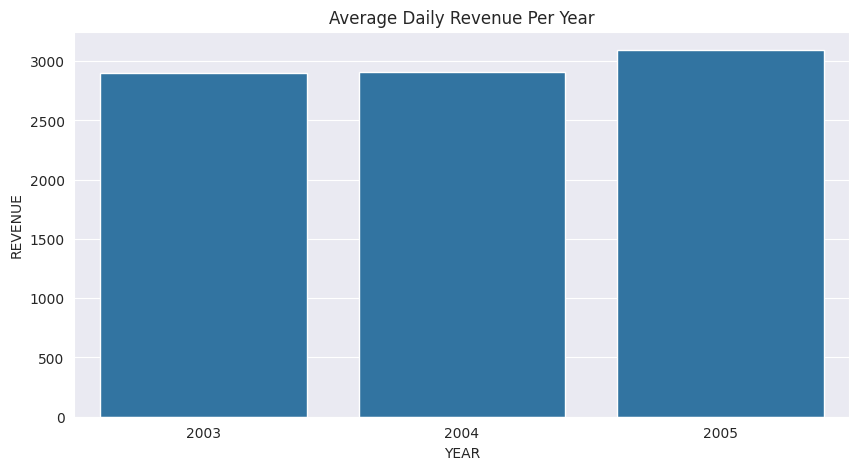

In [81]:
# Average Daily Revenue Per year
avg_daily_revenue = retail_df.groupby('YEAR')['REVENUE'].mean().reset_index()
print(avg_daily_revenue)
# plot a Barplot
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_daily_revenue,x='YEAR', y='REVENUE')
plt.title('Average Daily Revenue Per Year')
plt.show()

In [ ]:
#Sort retail df by orderdate
retail_df = retail_df.sort_values(by='ORDERDATE', inplace=True)

